## Performance Stats

In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = 1/2.54
linewidth = 14.6979 * cm # line width in TuDa template
sns.set_theme(context='paper', style='whitegrid', palette='deep', rc={'figure.figsize':(linewidth, 10*cm)})

In [2]:
stats_base_path = Path("performance/stats/")
dtnd_spool_stats = sorted(stats_base_path.glob("dtnd-spool*"))[-1]
monntpy_ingest_stats = sorted(stats_base_path.glob("monntpy-ingest*"))[-1]
monntpy_spool_stats = sorted(stats_base_path.glob("monntpy-spool*"))[-1]
monntpy_allonline_stats = sorted(stats_base_path.glob("monntpy-allonline*"))[-1]

In [3]:
def make_table(df):
    df = df.groupby("num_articles").describe().drop("25%", axis=1, level=1).drop("75%", axis=1, level=1).rename(columns={"50%": "median"})
    df["count"] = df["elapsed"]["count"].astype("int64")
    df.drop("count", axis=1, level=1, inplace=True)
    return df.reset_index().set_index(["num_articles", "count"])

Choose which stats to show:
- `all`: group runs with and without compression together
- `sep`: show runs with and without compression with different hues
- `none`: show only runs without compression
- `zlib`: show only runs with compression

In [4]:
def get_runs(df, sr):
    if sr == "none" or sr == "zlib":
        return df[df["compression"] == sr]
    return df

### Ingestion Performance

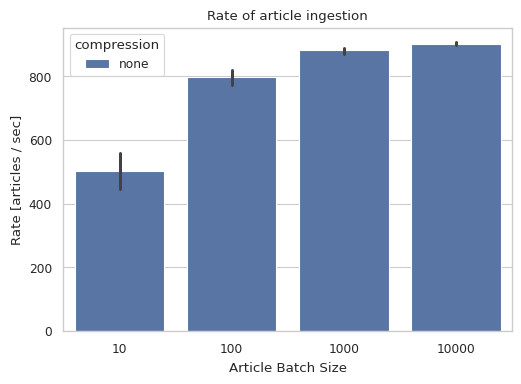

In [5]:
show_runs_ingest = "sep"
df_ingest = get_runs(pd.read_csv(monntpy_ingest_stats, sep=";"), show_runs_ingest)
g = sns.barplot(data=df_ingest, x="num_articles", y="rate", hue="compression" if show_runs_ingest == "sep" else None)
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]', title="Rate of article ingestion")

# sns.despine()
# plt.savefig("ch6_eval_monntpy_ingest.pdf")

In [6]:
table_ingest = make_table(df_ingest)

# with open("ch6_ingest_table.tex", "w") as fh:
#     fh.write(table_ingest.style.to_latex())

table_ingest

elapsed                                          rate  \
                        mean       std     min   median     max       mean   
num_articles count                                                           
10           40      0.02335  0.009692   0.013   0.0220   0.043  501.92370   
100          20      0.12630  0.009755   0.115   0.1245   0.150  796.03925   
1000         10      1.13580  0.020362   1.120   1.1260   1.187  880.68370   
10000        5      11.09660  0.075959  10.970  11.1260  11.162  901.21040   

                                                           
                           std      min   median      max  
num_articles count                                         
10           40     190.664160  232.558  458.333  769.230  
100          20      58.433008  666.666  803.329  869.565  
1000         10      15.345166  842.459  888.099  892.857  
10000        5        6.209476  895.896  898.795  911.577

### Spool Performance

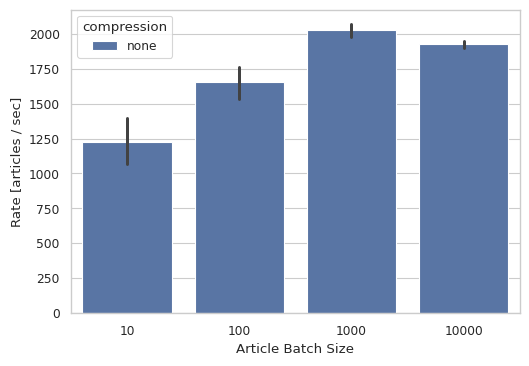

In [7]:
show_runs_dtnd_spool = "sep"
df_dtnd_spool = get_runs(pd.read_csv(dtnd_spool_stats, sep=";"), show_runs_dtnd_spool)

g = sns.barplot(data=df_dtnd_spool, x="num_articles", y="rate", hue="compression" if show_runs_dtnd_spool == "sep" else None)
# g = sns.barplot(data=df_dtnd_spool[df_dtnd_spool["compression"] == "none"], x="num_articles", y="rate")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("ch6_eval_dtnd_spool.pdf")

In [8]:
table_dtnd_spool = make_table(df_dtnd_spool)

# with open("ch6_dtnd_spool_table.tex", "w") as fh:
#     fh.write(table_dtnd_spool.style.to_latex())

table_dtnd_spool

elapsed                                        rate  \
                        mean       std    min  median    max        mean   
num_articles count                                                         
10           40     0.010475  0.005961  0.004  0.0090  0.024  1227.79325   
100          20     0.062100  0.010770  0.048  0.0585  0.087  1653.90195   
1000         10     0.494500  0.019225  0.467  0.4890  0.522  2024.96500   
10000        5      5.193400  0.091795  5.102  5.1810  5.347  1925.99420   

                                                              
                           std       min    median       max  
num_articles count                                            
10           40     560.759797   416.666  1111.111  2500.000  
100          20     267.736232  1149.425  1712.529  2083.333  
1000         10      77.798236  1915.708  2044.998  2141.327  
10000        5       33.515838  1870.207  1930.129  1960.015

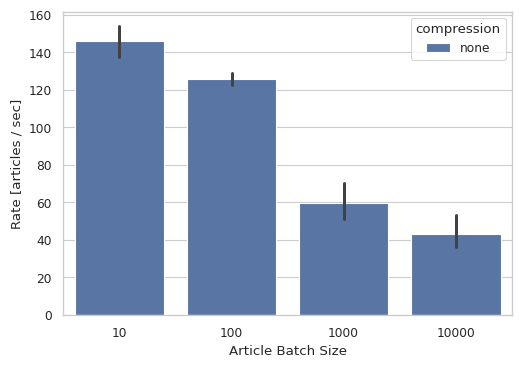

In [9]:
show_runs_monntpy_spool = "sep"
df_monntpy_spool = get_runs(pd.read_csv(monntpy_spool_stats, sep=";"), show_runs_monntpy_spool)

g = sns.barplot(data=df_monntpy_spool, x="num_articles", y="rate", hue="compression" if show_runs_monntpy_spool == "sep" else None)
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("ch6_eval_monntpy_spool.pdf")

In [10]:
table_monntpy_spool = make_table(df_monntpy_spool)

# with open("ch6_monntpy_spool_table.tex", "w") as fh:
#     fh.write(table_monntpy_spool.style.to_latex())

table_monntpy_spool

elapsed                                         \
                         mean        std      min    median      max   
num_articles count                                                     
10           40       0.07130   0.014958    0.053    0.0645    0.112   
100          20       0.79695   0.049824    0.709    0.8005    0.877   
1000         10      17.73010   3.608572   10.732   19.5635   20.009   
10000        5      242.90860  49.480813  160.730  272.2200  275.042   

                         rate                                         
                         mean        std      min    median      max  
num_articles count                                                    
10           40     145.79950  27.712920   89.285  155.0480  188.679  
100          20     125.94965   7.959946  114.025  124.9215  141.043  
1000         10      59.47250  16.807377   49.977   51.1155   93.179  
10000        5       42.97020  11.141069   36.358   36.7340   62.216

### Sequential Client Transfer Performance

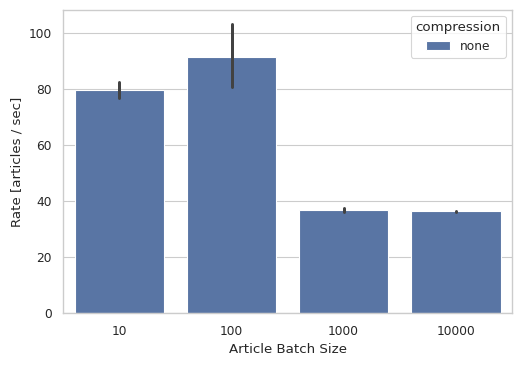

In [11]:
show_runs_seq = "sep"
df_seq = get_runs(pd.read_csv(monntpy_allonline_stats, sep=";"), show_runs_seq)

g = sns.barplot(data=df_seq, x="num_articles", y="rate", hue="compression" if show_runs_seq == "sep" else None)
# g = sns.barplot(data=df_seq[df_seq["compression"] == "none"], x="num_articles", y="rate")
_ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]')

# plt.savefig("ch6_eval_monntpy_allonline.pdf")

In [12]:
table_seq = make_table(df_seq)

# with open("ch6_seq_table.tex", "w") as fh:
#     fh.write(table_seq.style.to_latex())

table_seq

elapsed                                        \
                          mean       std      min    median      max   
num_articles count                                                     
10           40       0.127875  0.017777    0.106    0.1230    0.171   
100          20       1.164500  0.255559    0.731    1.2765    1.398   
1000         10      27.358300  0.837473   25.308   27.2825   28.339   
10000        3      275.612333  1.105494  274.339  276.1710  276.327   

                         rate                                       
                         mean        std     min   median      max  
num_articles count                                                  
10           40     79.565375  10.152083  58.479  81.3060   94.339  
100          20     91.307850  26.144455  71.530  78.3425  136.798  
1000         10     36.583700   1.170200  35.287  36.6530   39.513  
10000        3      36.283000   0.145836  36.189  36.2090   36.451

In [13]:
df_seq.describe()

,num_articles,elapsed,rate
count,73.000000,73.000000,73.000000
mean,580.821918,15.463356,75.115863
std,1991.569561,55.019391,24.274414
min,10.000000,0.106000,35.287000
25%,10.000000,0.122000,66.666000
50%,10.000000,0.160000,76.687000
75%,100.000000,1.328000,86.206000
max,10000.000000,276.327000,136.798000


## Network Simulation Evaluation

First import all needed libraries and set global constants and configurations:

In [14]:
import glob
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm = 1/2.54
linewidth = 14.6979 * cm # line width in TuDa template
sns.set_theme(context='paper', style='whitegrid', palette='deep', rc={'figure.figsize':(linewidth, 10*cm)})

We define two functions to read in the `clab` output:

- `get_pidstat_df` reads in pidstat output and adds a duration column as well as a node column to identify the reading
- `get_network_df` reads in network traffic logs and adds a duration column as well as a node column to identify the reading. Also, some units are transformed to make the stats more readable

In [15]:
correct_log_header = "Time          UID       PID    %usr %system  %guest   %wait    %CPU   CPU  minflt/s  majflt/s     VSZ     RSS   %MEM   kB_rd/s   kB_wr/s kB_ccwr/s iodelay  Command\n"
del_col = ["Command", "PID", "%system","%guest", "%wait"]

def get_pidstat_df(scen_dir, nodes):
    pidstat_df = pd.DataFrame()
    
    for node_name in nodes:
        for filepath in glob.glob(f"net-sim/eval/{scen_dir}/results-*/n*/pidstat-{node_name}.csv.log"):

            # change header since Pandas will not be able to parse it correctly
            with open(filepath, "r") as fh:
                lines = fh.readlines()
            lines[0] = correct_log_header
            # store it in a temporary file object so we don't need to
            # modify the (potentially protected) original file
            data = io.StringIO("".join(lines))

            df = pd.read_fwf(data)
            df["duration"] = df["Time"] - df["Time"][0]
            df["node"] = node_name
            # for c in del_col:
            #        del df[c]
            pidstat_df = pd.concat([pidstat_df, df], ignore_index=True)
            
    return pidstat_df

In [16]:
csv_header = ["timestamp", "iface_name", "bytes_out/s", "bytes_in/s", "bytes_total/s", "bytes_in", "bytes_out", "packets_out/s",
    "packets_in/s", "packets_total/s", "packets_in", "packets_out", "errors_out/s", "errors_in/s", "errors_in", "errors_out"]

def get_network_df(scen_dir, nodes):
    net_df = pd.DataFrame()
    
    for node_name in nodes:
        for filepath in glob.glob(f"net-sim/eval/{scen_dir}/results-*/n*/net-{node_name}.log"):
            df = pd.read_csv(filepath, sep=";", names=csv_header)
            df["duration"] = (df["timestamp"] - df["timestamp"][0]).round(0).astype(int)
            df["node"] = node_name
            df["kb_in/s"] = df["bytes_in/s"] / 1000
            df["kb_out/s"] = df["bytes_out/s"] / 1000
            df["kb_total/s"] = df["bytes_total/s"] / 1000
            
            net_df = pd.concat([net_df, df], ignore_index=True)
    
    return net_df

### Scenario `1k`

In this scenario, three nodes start off with no connection between them. `n1` is pre-loaded with $1000$ articles that are in the DB of the *moNNT.py Server* and in the store of the *dtnd*.

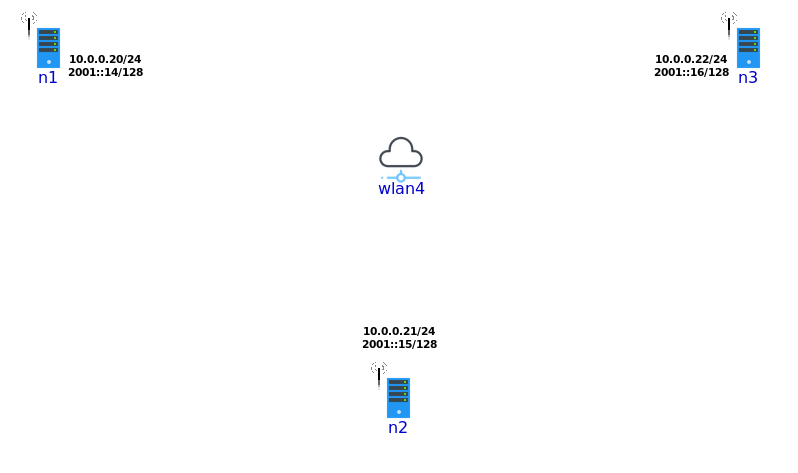

Then the simulation runs through the following steps:

1. Wait 10 seconds
2. `n2` moves into proximity of `n1` -- after a short period both *dtnd* instances will discover eachother and exchange previously unknown bundles, which will then be pushed to the respective *moNNT.py* instance.
3. Wait 10 seconds
4. `n2` moves into proximity of `n3` -- analog to step 2.
5. Wait 10 seconds

In [39]:
nodes_1k = ["n1", "n2", "n3"]
scen_dir_1k = "1k"

#### CPU utilization, memory usage, and storage writes

In [40]:
pidstat_1k_df = get_pidstat_df(scen_dir=scen_dir_1k, nodes=nodes_1k)

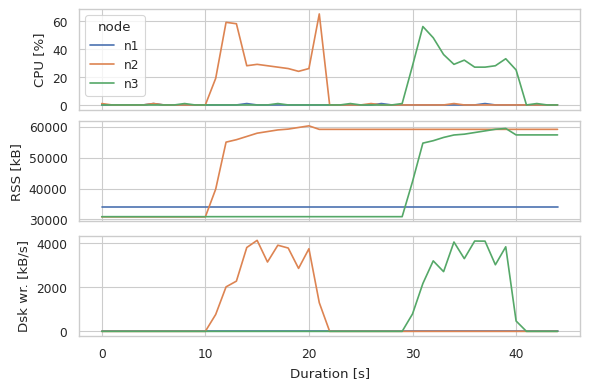

In [41]:
stats_1k = ["%CPU", "RSS", "kB_wr/s"]
cols_1k, rows_1k = [1, len(stats_1k)]

fig_1k, ax_1k = plt.subplots(rows_1k, cols_1k, figsize=(linewidth, rows_1k*3.2*cm), constrained_layout=True, sharex=True)
for i, g in enumerate(stats_1k):
    sns.lineplot(data=pidstat_1k_df, x="duration", y=g, hue="node", ax=ax_1k[i])
    if i > 0:
        ax_1k[i].get_legend().remove()

# Update labels
ax_1k[0].set(ylabel="CPU [%]")  # , title="Scenario 1k Performance Metrics")
ax_1k[1].set(ylabel="RSS [kB]")
ax_1k[2].set(ylabel="Dsk wr. [kB/s]", xlabel="Duration [s]")

# save legend for later on
global_handles, global_labels = ax_1k[0].get_legend_handles_labels()

In [42]:
fig_1k.savefig("ch6_1k_cpu_str.pdf")

#### Network transfers

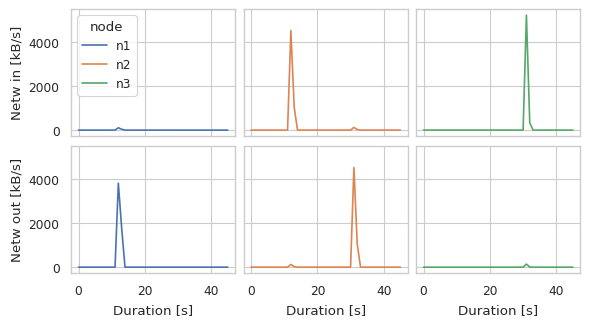

In [43]:
net_1k_df = get_network_df(scen_dir=scen_dir_1k, nodes=nodes_1k)
y_cols_1k = ["kb_in/s", "kb_out/s"]  # , "bytes_total/s"]

fig_net_1k, ax_net_1k = plt.subplots(2, 3, figsize=(linewidth, 2*4*cm), constrained_layout=True, sharey=True, sharex=True)
for i, y_col in enumerate(y_cols_1k):
    for j, n in enumerate(nodes_1k):
        sns.lineplot(
            data=net_1k_df[(net_1k_df["iface_name"] == "total") & (net_1k_df["node"] == n)],
            x="duration", y=y_col, color=sns.color_palette()[j], ax=ax_net_1k[i][j])

# Update Labels
# _ = g.set(xlabel='Article Batch Size', ylabel='Rate [articles / sec]', title="Rate of article ingestion")
ax_net_1k[0][0].set(ylabel="Netw in [kB/s]")
ax_net_1k[1][0].set(ylabel="Netw out [kB/s]", xlabel="Duration [s]")
ax_net_1k[1][1].set(xlabel="Duration [s]")
ax_net_1k[1][2].set(xlabel="Duration [s]")
_ = ax_net_1k[0][0].legend(title="node", handles=global_handles, labels=global_labels, loc='upper left')

In [22]:
fig_net_1k.savefig("ch6_1k_net.pdf")

#### Reliability

In order to call the implementation **reliable**, all messages that were first stored on `n1` must be transferred
to `n3` through `n2`. We will count received bundles on nodes `n2` and `n3` to ensure reliable transfer.

The following code searches all produced `dtnd` logs on nodes `n2` and `n3` for the phrase `Received new bundle: dtn://n1`, which should occur
exactly $1000$ times on each node on each run. In this case, the code will output `True`:

In [23]:
counts_1k = []
for node_name in nodes_1k[1:]:
    for filepath in glob.glob(f"net-sim/eval/1k/results-*/n*/nohup.dtnd_{node_name}.log"):
        with open(filepath, "r") as fh:
            counts_1k.append(fh.read().count("Received new bundle: dtn://n1"))
all([c == 1000 for c in counts_1k])

False

### Scenario `always_on`

In this scenario, two nodes are within range of each other continuously. After an initial delay of 2 seconds, news clients on both nodes send articles every 0.3 seconds. These are first processed by the local *moNNT.py* and *dtnd* instances before being sent to the other node, where they are also processed and integrated into the database, respectively store.

In [24]:
nodes_ao = ["n1", "n2"]
scen_dir_ao = "always_on"

#### CPU utilization, memory usage, and storage writes

In [25]:
pidstat_ao_df = get_pidstat_df(scen_dir=scen_dir_ao, nodes=nodes_ao)

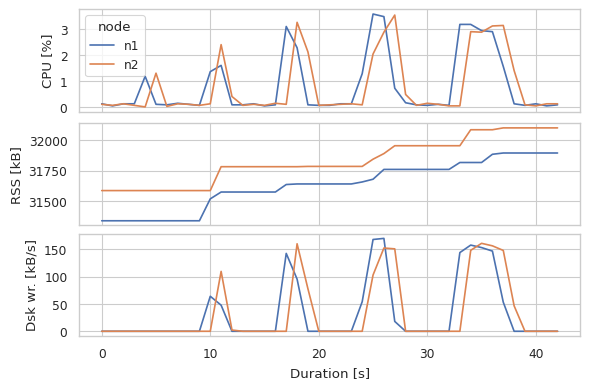

In [26]:
stats_ao = ["%CPU", "RSS", "kB_wr/s"]
cols_ao, rows_ao = [1, len(stats_ao)]

fig_ao, ax_ao = plt.subplots(rows_ao, cols_ao, figsize=(linewidth, rows_ao*3.2*cm), constrained_layout=True, sharex=True)
for i, g in enumerate(stats_ao):
    sns.lineplot(data=pidstat_ao_df, x="duration", y=g, hue="node", ax=ax_ao[i], errorbar=None)
    if i > 0:
        ax_ao[i].get_legend().remove()

# Update labels
ax_ao[0].set(ylabel="CPU [%]")  # , title="Scenario 1k Performance Metrics")
ax_ao[1].set(ylabel="RSS [kB]")
ax_ao[2].set(ylabel="Dsk wr. [kB/s]", xlabel="Duration [s]")
        
# save legend for later on
global_handles, global_labels = ax_ao[0].get_legend_handles_labels()

In [27]:
fig_ao.savefig("ch6_always_on_cpu_str.pdf")

#### Network transfers

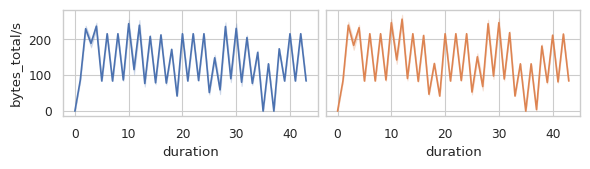

In [28]:
net_ao_df = get_network_df(scen_dir=scen_dir_ao, nodes=nodes_ao)
# y_cols = ["kb_in/s", "kb_out/s"]  # , 
y_cols_net_ao = "bytes_total/s"

fig_net_ao, ax_net_ao = plt.subplots(1, len(nodes_ao), figsize=(linewidth, 4*cm), constrained_layout=True, sharey=True, sharex=True)
for i, n in enumerate(nodes_ao):
    sns.lineplot(
        data=net_ao_df[(net_ao_df["iface_name"] == "total") & (net_ao_df["node"] == n)],
        x="duration", y=y_cols_net_ao, color=sns.color_palette()[i], ax=ax_net_ao[i])
global_handles, global_labels = ax_ao[0].get_legend_handles_labels()

In [29]:
fig_net_ao.savefig("ch6_always_on_net.pdf")

### Scenario `busynode`

In [30]:
nodes_bn = ["n1", "n2"]
scen_dir_bn_nozip = "busynode_nozip"
scen_dir_bn_zip = "busynode_zip"
pidstat_bn_nozip_df = get_pidstat_df(scen_dir=scen_dir_bn_nozip, nodes=nodes_bn)
pidstat_bn_zip_df = get_pidstat_df(scen_dir=scen_dir_bn_zip, nodes=nodes_bn)

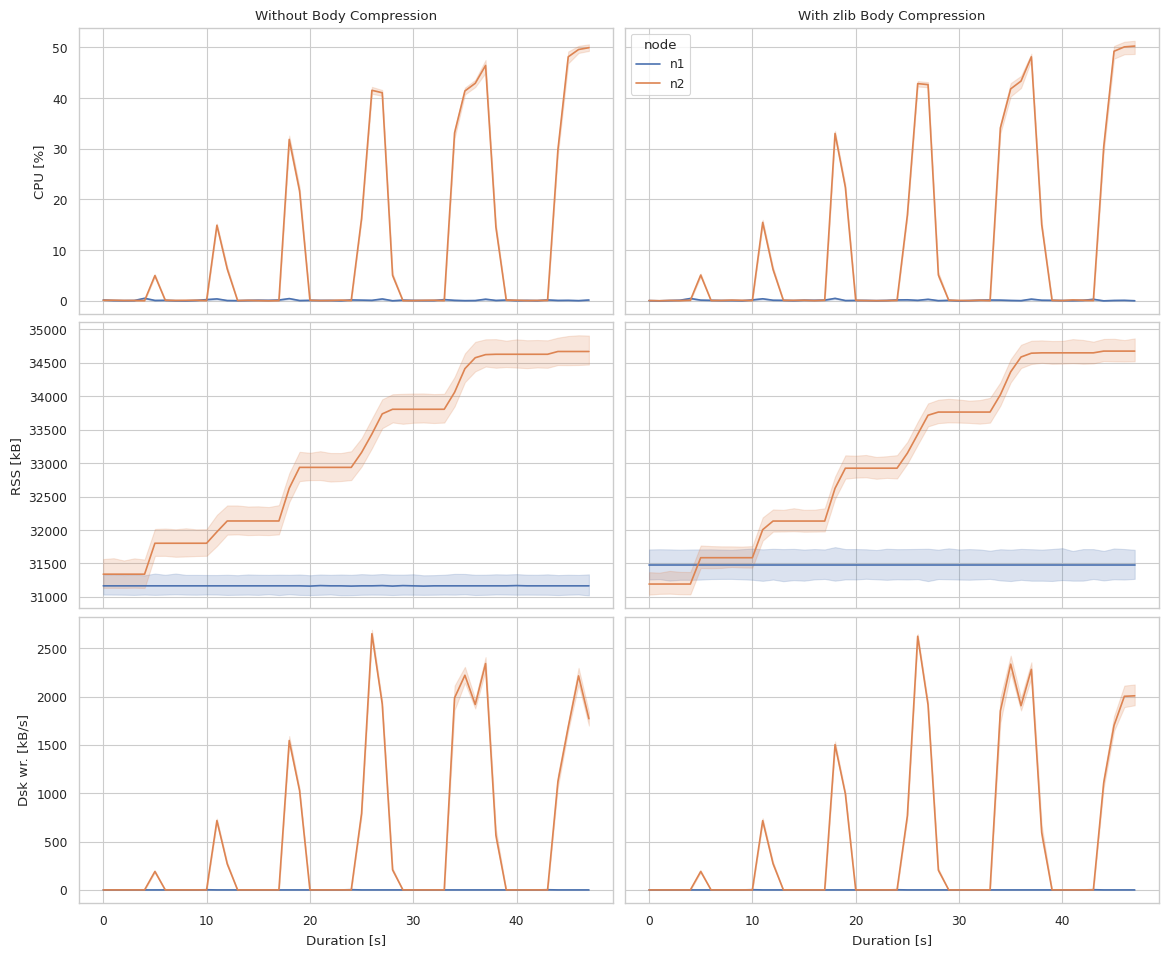

In [31]:
cols_bn, rows_bn = [2, 3]

fig_bn, ax_bn = plt.subplots(rows_bn, cols_bn, figsize=(2*linewidth, 2*rows_bn*4*cm), constrained_layout=True, sharex=True, sharey="row")
for i, g in enumerate(["%CPU", "RSS", "kB_wr/s"]):
    sns.lineplot(data=pidstat_bn_nozip_df, x="duration", y=g, hue="node", ax=ax_bn[i][0], legend=False)
    sns.lineplot(data=pidstat_bn_zip_df, x="duration", y=g, hue="node", ax=ax_bn[i][1])
    if i > 0:
        ax_bn[i][1].get_legend().remove()

# Update labels
_ = ax_bn[0][0].set(ylabel="CPU [%]", title="Without Body Compression")
_ = ax_bn[0][1].set(title="With zlib Body Compression")
_ = ax_bn[1][0].set(ylabel="RSS [kB]")
_ = ax_bn[2][0].set(ylabel="Dsk wr. [kB/s]", xlabel="Duration [s]")
_ = ax_bn[2][1].set(xlabel="Duration [s]")

In [32]:
fig_bn.savefig("ch6_busynode_cpu_str.pdf")

#### Network transfers

In [37]:
net_bn_nozip_df = get_network_df(scen_dir=scen_dir_bn_nozip, nodes=nodes_bn)
net_bn_nozip_df = net_bn_nozip_df[(net_bn_nozip_df["iface_name"] == "total")]

net_bn_zip_df = get_network_df(scen_dir=scen_dir_bn_zip, nodes=nodes_bn)
net_bn_zip_df = net_bn_zip_df[(net_bn_zip_df["iface_name"] == "total")]
y_cols_net_bn = ["kb_in/s", "kb_out/s"]  # , "bytes_total/s"]
"""
fig_net_bn, ax_net_bn = plt.subplots(len(y_cols_net_bn), len(nodes_bn), figsize=(3*linewidth, 2*2*4*cm), constrained_layout=True, sharey=True, sharex=True)
for in_out, y_col in enumerate(y_cols_net_bn):
    for j, n in enumerate(nodes_bn):
        sns.lineplot(data=net_bn_nozip_df[net_bn_nozip_df["node"] == n], x="duration", y=y_col, ax=ax_net_bn[in_out][j], errorbar=None)
        sns.lineplot(data=net_bn_zip_df[net_bn_zip_df["node"] == n], x="duration", y=y_col, ax=ax_net_bn[in_out][j], errorbar=None)

# _ = ax_net_bn[0][0].legend(current_handles, ["node", "n1", "n2", "n3"], loc="upper left")
"""

'\nfig_net_bn, ax_net_bn = plt.subplots(len(y_cols_net_bn), len(nodes_bn), figsize=(3*linewidth, 2*2*4*cm), constrained_layout=True, sharey=True, sharex=True)\nfor in_out, y_col in enumerate(y_cols_net_bn):\n    for j, n in enumerate(nodes_bn):\n        sns.lineplot(data=net_bn_nozip_df[net_bn_nozip_df["node"] == n], x="duration", y=y_col, ax=ax_net_bn[in_out][j], errorbar=None)\n        sns.lineplot(data=net_bn_zip_df[net_bn_zip_df["node"] == n], x="duration", y=y_col, ax=ax_net_bn[in_out][j], errorbar=None)\n\n# _ = ax_net_bn[0][0].legend(current_handles, ["node", "n1", "n2", "n3"], loc="upper left")\n'

[Text(0.5, 1.0, 'With zlib Body Compression')]

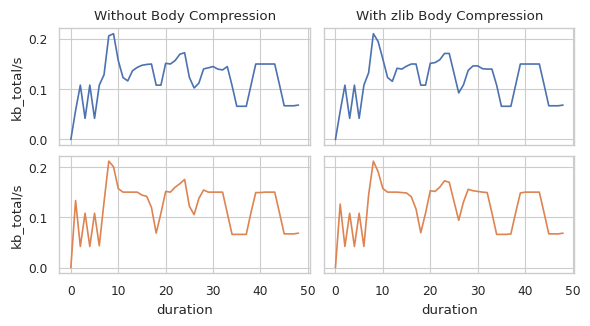

In [38]:
fig_net_bn, ax_net_bn = plt.subplots(2, 2, figsize=(linewidth, 2*4*cm), constrained_layout=True, sharey=True, sharex=True)
sns.lineplot(data=net_bn_nozip_df[net_bn_nozip_df["node"] == "n1"], x="duration", y="kb_total/s", color=sns.color_palette()[0], ax=ax_net_bn[0][0], errorbar=None)
sns.lineplot(data=net_bn_zip_df[net_bn_zip_df["node"] == "n1"], x="duration", y="kb_total/s", color=sns.color_palette()[0], ax=ax_net_bn[0][1], errorbar=None)
sns.lineplot(data=net_bn_nozip_df[net_bn_nozip_df["node"] == "n2"], x="duration", y="kb_total/s", color=sns.color_palette()[1], ax=ax_net_bn[1][0], errorbar=None)
sns.lineplot(data=net_bn_zip_df[net_bn_zip_df["node"] == "n2"], x="duration", y="kb_total/s", color=sns.color_palette()[1], ax=ax_net_bn[1][1], errorbar=None)

ax_net_bn[0][0].set(title="Without Body Compression")
ax_net_bn[0][1].set(title="With zlib Body Compression")
# _ = ax_net_bn[0][1].legend(title="node", handles=global_handles, labels=global_labels, loc='upper right')

In [35]:
net_bn_nozip_df["kb_in/s"].sum()

268.73967000000005

In [36]:
net_bn_zip_df["kb_in/s"].sum()

268.68349

In [ ]:
net_bn_nozip_df["packets_out"].sum()

In [13]:
net_bn_zip_df

NameError: name 'net_bn_zip_df' is not defined

In [ ]:
net_bn_nozip_df.columns